In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import time

In [2]:
df=pd.read_csv("Reviews.csv")[:10000]

## 1. Top-10 Reviewer
Sort by number of reviews (hint : "ProfileName", "UserId")

Also, show his/her average score

In [3]:
top_10= df.groupby(['UserId','ProfileName'])['Score'].count().sort_values(ascending=False)[:10] 
output= []
for i in top_10.index:
    Score_count = df[df['UserId']==i[0]]['Score'].count()
    Score_mean = df[df['UserId']==i[0]]['Score'].mean()
    output.append([Score_count ,Score_mean])
output = pd.DataFrame(output, index=top_10.index, columns=['Score count', 'Score mean'])

In [4]:
output

,,Score count,Score mean
UserId,ProfileName,,
A1Z54EM24Y40LL,c2,17,3.882353
A2SZLNSI5KOQJT,"Carrie, ""Formerly &#34;Sister Carrie&#34;""",10,3.800000
A35R32TA60XD57,M. Torma,9,4.111111
A281NPSIMI1C2R,"Rebecca of Amazon ""The Rebecca Review""",8,5.000000
A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",7,4.428571
A3NHUQ33CFH3VM,Citizen John,7,3.142857
A3PJZ8TU8FDQ1K,Jared Castle,7,4.714286
A3TX6CWSZL02PW,"LaVerne "":LaVerne""",6,5.000000
AQQLWCMRNDFGI,Steven A. Peterson,6,4.166667


## 2. Plot score distribution for the user with the most number of reviews

In [5]:
top_1=df[df["UserId"]=="A1Z54EM24Y40LL"]

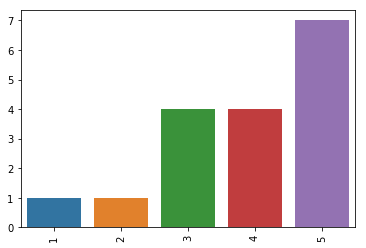

In [6]:
bar=sns.countplot(data=top_1, x = 'Score')
bar.set_xticklabels(bar.get_xticklabels(),rotation=90)
bar.set(xlabel='', ylabel='')
plt.show()

## 3. Plot pandas Series DataFrame (Time->Date)
axis-X : Date of reviews (transfer column "Time" -> Date)

axis-Y : Numbers of reviews in the date interval

Type : bar graph

In [7]:
df["Year"]=df["Time"].apply(lambda x: time.strftime("%Y", time.gmtime(x)))

In [8]:
y=df.groupby(['Year']).agg('count')["Id"]

In [9]:
y

Year
2000       2
2004      20
2005      28
2006     122
2007     370
2008     508
2009    1193
2010    1621
2011    2890
2012    3246
Name: Id, dtype: int64

In [10]:
count=list(y)
count.insert( 1, 0)
count.insert( 1, 0)
count.insert( 1, 0)

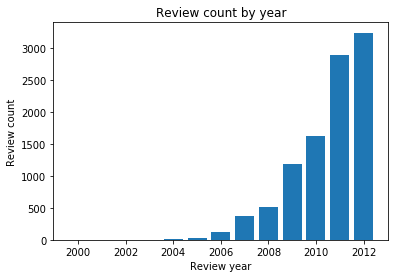

In [11]:
plt.bar(np.arange(2000,2013),count)
plt.xlabel('Review year')
plt.ylabel('Review count')
plt.title("Review count by year")
plt.show()

## 4. Plot HeatMap using seaborn
Correlation between numeric features (Id, HelpfulnessNumerator, HelpfulnessDenominator, Score, Time)

In [12]:
heat_df=df[["Id","HelpfulnessNumerator","HelpfulnessDenominator","Score","Time"]]

In [13]:
corr_matrix=heat_df.corr()

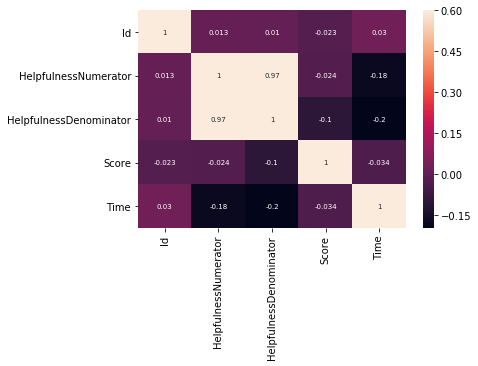

In [14]:
sns.heatmap(corr_matrix,vmax=0.6,annot=True,annot_kws={'size':7})

## 5. Helpful percent
If viewers of that comment upvote the comment, then it adds to Helpfulness numerator.

If viewers of that comment just make a comment, then it adds to Helpfulness denominator.

Note : you should filter out some cases with numerator > denominator

Plot the distribution of helpful percent (hint: .hist())

Ratio = -1, if both Helpfulness numerator & Helpfulness denominator are zero.

In [15]:
df["Helpful percent"]=df["HelpfulnessNumerator"]/df["HelpfulnessDenominator"]
df=df.fillna(-1)
df=df[df["Helpful percent"]<=1]

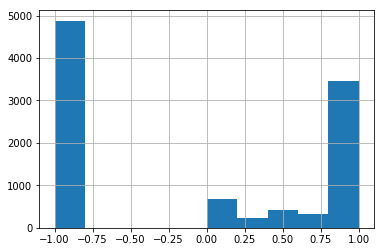

In [16]:
plt.hist(df["Helpful percent"])
plt.grid(True)